ANALIZAR LA DATA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

In [2]:
archivo = "Employe_Performance_dataset.csv"
df = pd.read_csv(archivo)

In [3]:
df.head()

,ID,Name,Age,Gender,Department,Salary,Joining Date,Performance Score,Experience,Status,Location,Session
0,1,Cory Escobar,48,Female,HR,5641,2015-05-03,2.0,16,Active,New York,Night
1,2,Timothy Sanchez,25,Other,Sales,4249,2020-11-09,2.0,11,Inactive,Los Angeles,Evening
2,3,Chad Nichols,57,Other,Sales,3058,2019-02-12,NaN,1,Inactive,New York,Morning
3,4,Christine Williams,58,Female,IT,5895,2017-09-08,2.0,13,Inactive,Los Angeles,Evening
4,5,Amber Harris,35,Other,IT,4317,2020-02-15,5.0,16,Inactive,New York,Evening


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1000 non-null   int64  
 1   Name               1000 non-null   object 
 2   Age                1000 non-null   int64  
 3   Gender             1000 non-null   object 
 4   Department         1000 non-null   object 
 5   Salary             1000 non-null   int64  
 6   Joining Date       1000 non-null   object 
 7   Performance Score  502 non-null    float64
 8   Experience         1000 non-null   int64  
 9   Status             1000 non-null   object 
 10  Location           1000 non-null   object 
 11  Session            1000 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 93.9+ KB


In [5]:
df.isnull().sum().sort_values(ascending=False)

Performance Score    498
ID                     0
Age                    0
Name                   0
Gender                 0
Department             0
Salary                 0
Joining Date           0
Experience             0
Status                 0
Location               0
Session                0
dtype: int64

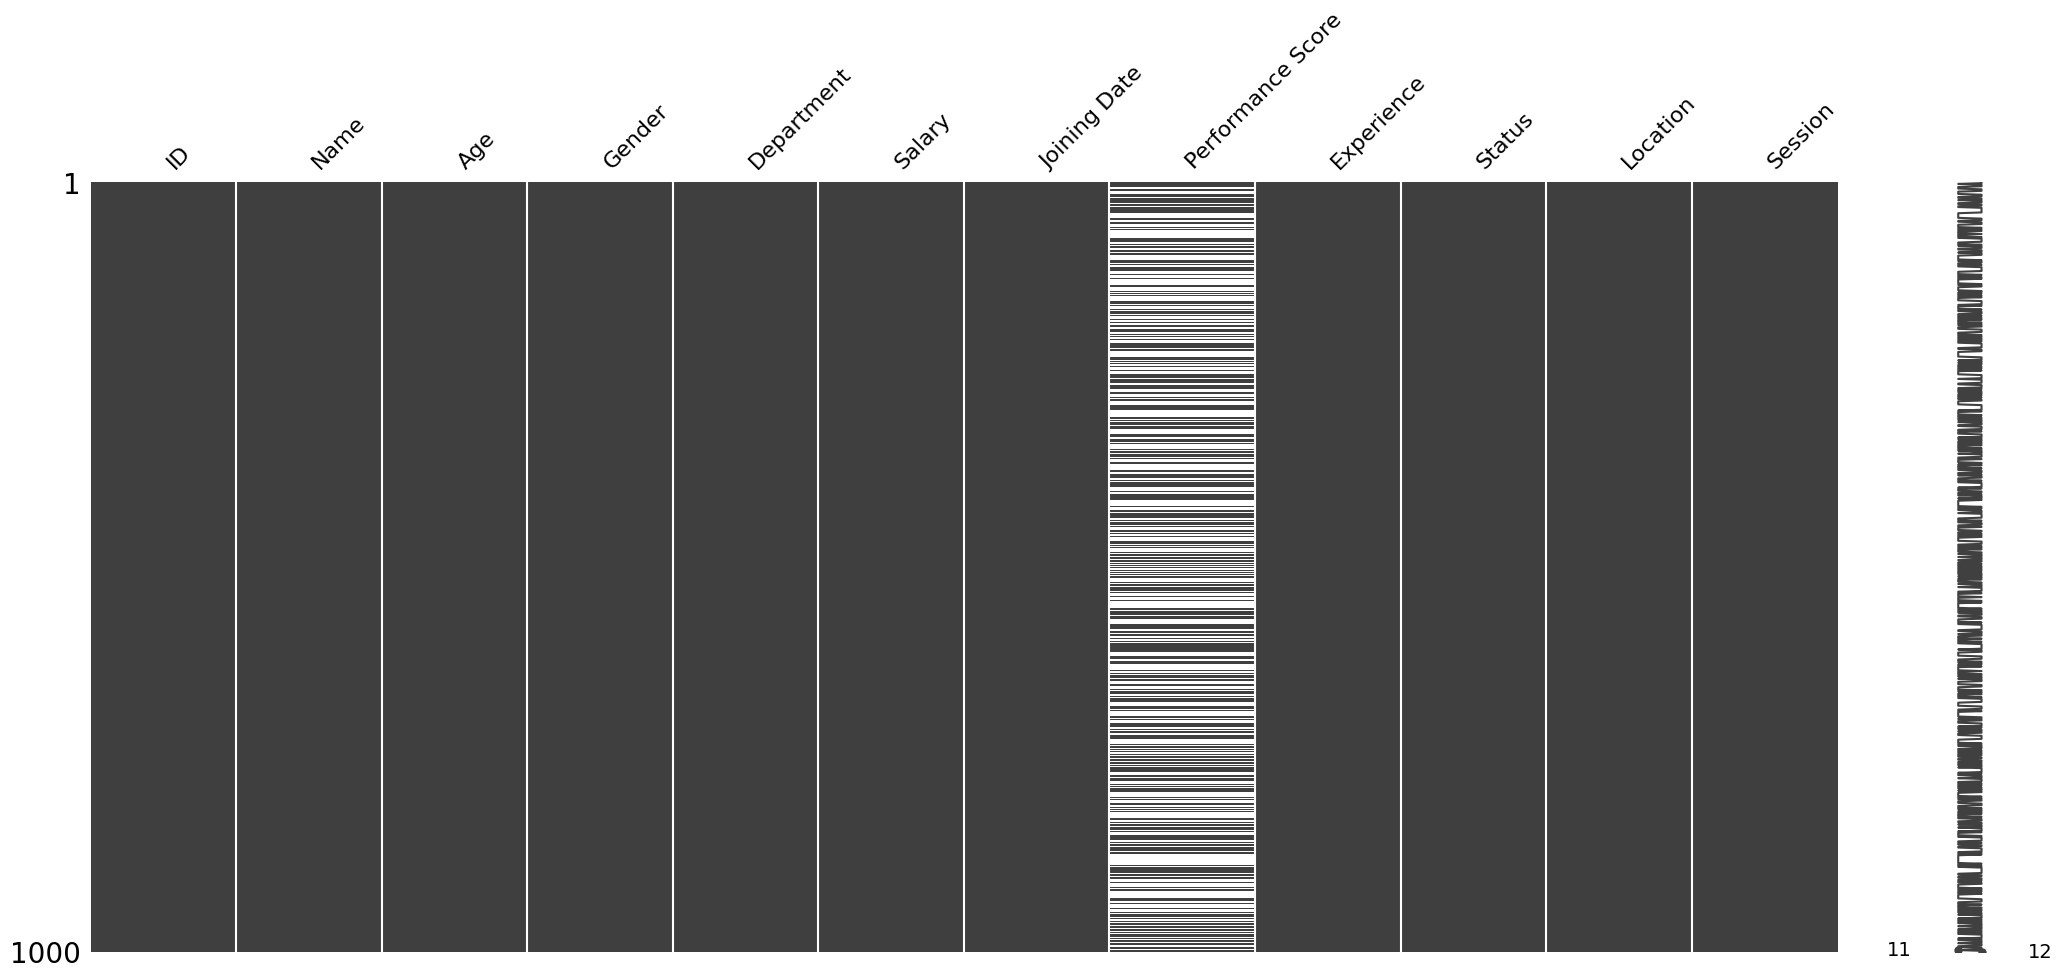

In [6]:
import missingno as msn

msn.matrix(df)
plt.show()

In [7]:
colNum = df.select_dtypes(include="number").columns.tolist()
colNum = [c for c in colNum if c not in ['ID']]

for col in colNum:
    serie = pd.to_numeric(df[col], errors="coerce")
    print("----------------------------------------------------------------------------------")
    print(f"Media {col}:{serie.mean():.2f}, Mediana {col}:{serie.median():.2f}")
    print(f"Moda {col}:{serie.mode()[0]:.2f}, Distribucion estandar {col}:{serie.std():.2f}")
    print(f"Varianza {col}:{serie.var():.2f}")
    q1 = serie.quantile(0.25);q3 = serie.quantile(0.75);iqr = q3 - q1
    print(f"Cuartil 1 de {col}:{q1}, IQR de {col}:{iqr}, Cuartil 3 de {col}:{q3}")
    print(f"Valor minimo de {col}:{serie.min()}, Valor maximo de {col}:{serie.max()}")

----------------------------------------------------------------------------------
Media Age:40.78, Mediana Age:40.00
Moda Age:20.00, Distribucion estandar Age:14.12
Varianza Age:199.51
Cuartil 1 de Age:28.0, IQR de Age:24.0, Cuartil 3 de Age:52.0
Valor minimo de Age:18, Valor maximo de Age:65
----------------------------------------------------------------------------------
Media Salary:5917.37, Mediana Salary:5889.00
Moda Salary:2364.00, Distribucion estandar Salary:2299.42
Varianza Salary:5287323.15
Cuartil 1 de Salary:3829.75, IQR de Salary:4073.5, Cuartil 3 de Salary:7903.25
Valor minimo de Salary:2015, Valor maximo de Salary:9993
----------------------------------------------------------------------------------
Media Performance Score:2.91, Mediana Performance Score:3.00
Moda Performance Score:2.00, Distribucion estandar Performance Score:1.42
Varianza Performance Score:2.03
Cuartil 1 de Performance Score:2.0, IQR de Performance Score:2.0, Cuartil 3 de Performance Score:4.0
Valor

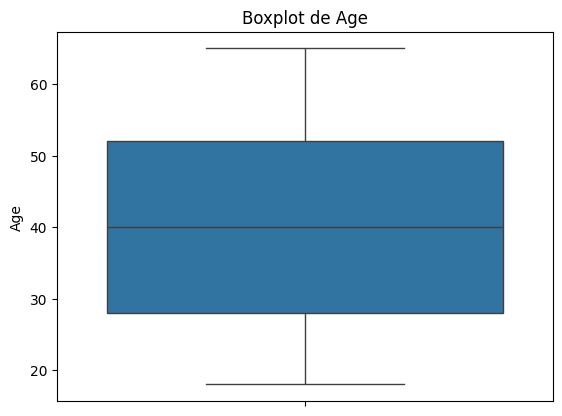

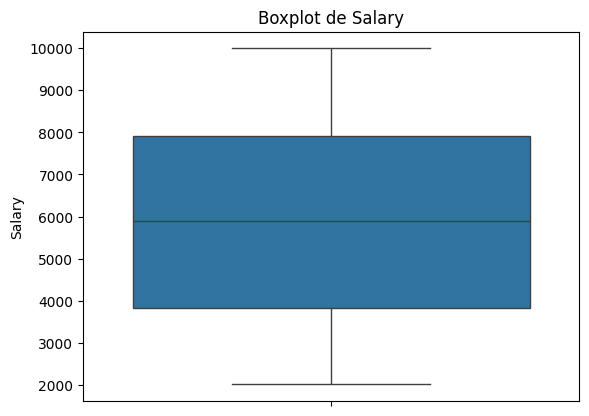

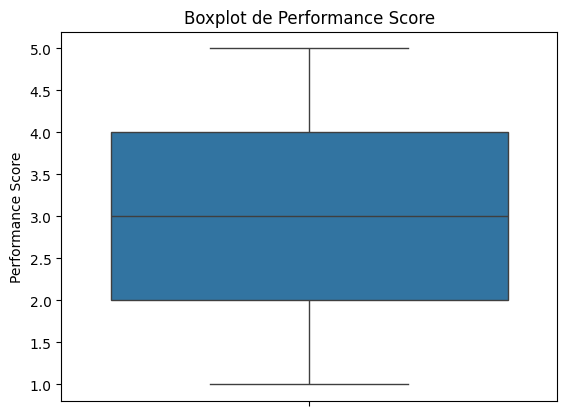

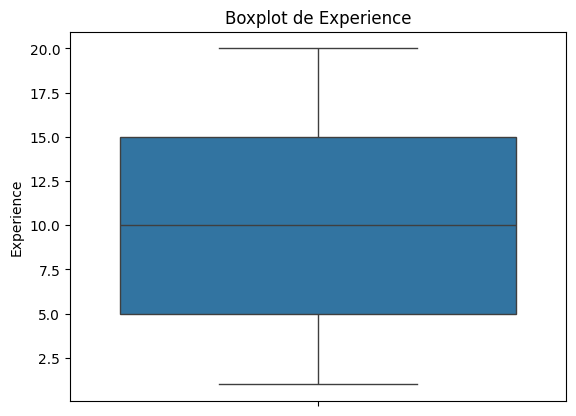

In [8]:
colNum = df.select_dtypes(include="number").columns.tolist()
colNum = [c for c in colNum if c not in ['ID']]

for col in colNum:
    serie = pd.to_numeric(df[col], errors="coerce")
    sns.boxplot(serie)
    plt.title(f"Boxplot de {col}")
    plt.show()

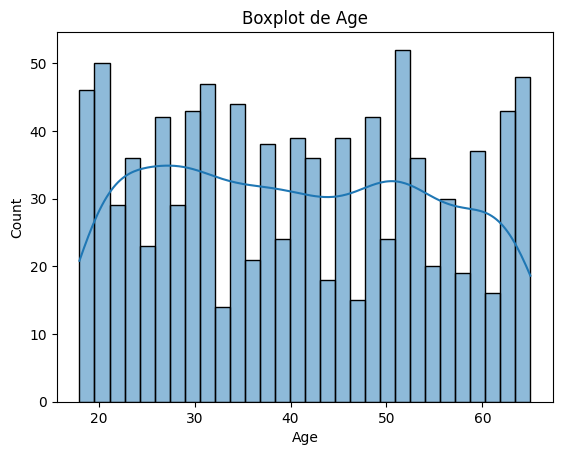

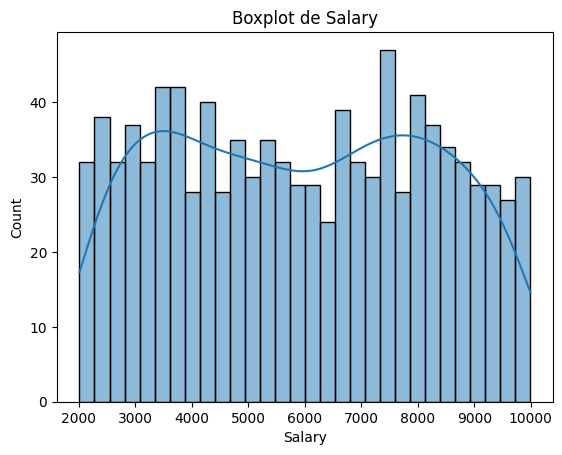

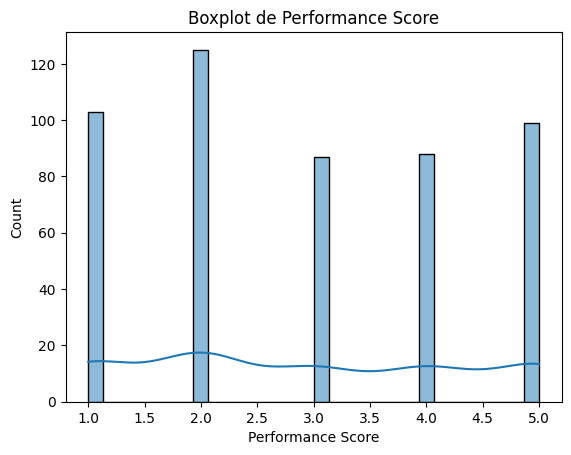

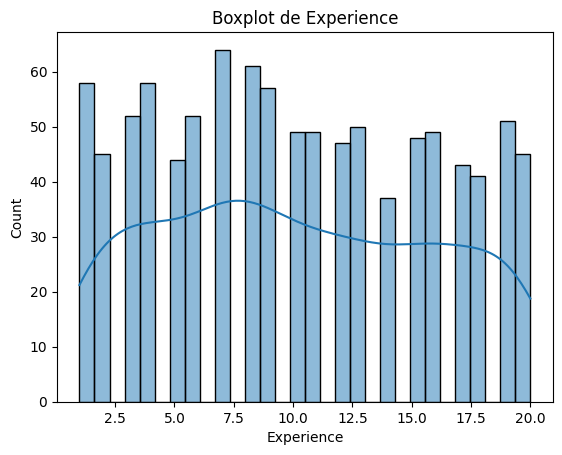

In [9]:
colNum = df.select_dtypes(include="number").columns.tolist()
colNum = [c for c in colNum if c not in ['ID']]

for col in colNum:
    serie = pd.to_numeric(df[col], errors="coerce")
    sns.histplot(serie, kde=True, bins=30)
    plt.title(f"Boxplot de {col}")
    plt.show()

In [10]:
colNum = df.select_dtypes(include="number").columns.tolist()
colNum = [c for c in colNum if c not in ['ID']]

for col in colNum:
    serie = pd.to_numeric(df[col], errors="coerce")
    print("------------------------------------------------")
    print(f"Asimetria de {col}:{serie.skew()}")
    print(f"Curtosis de {serie.kurtosis()}")

------------------------------------------------
Asimetria de Age:0.07577101871203541
Curtosis de -1.219730109261926
------------------------------------------------
Asimetria de Salary:0.025263025887932996
Curtosis de -1.2275169716019176
------------------------------------------------
Asimetria de Performance Score:0.1419468138760893
Curtosis de -1.3171482846816251
------------------------------------------------
Asimetria de Experience:0.10817463173702258
Curtosis de -1.154184913035596


LIMPIEZA Y PREPROCESAMIENTO

In [11]:
#Limpieza de valores nulos
df.isna().sum().sort_values(ascending=False)

Performance Score    498
ID                     0
Age                    0
Name                   0
Gender                 0
Department             0
Salary                 0
Joining Date           0
Experience             0
Status                 0
Location               0
Session                0
dtype: int64

In [12]:
df.dtypes

ID                     int64
Name                  object
Age                    int64
Gender                object
Department            object
Salary                 int64
Joining Date          object
Performance Score    float64
Experience             int64
Status                object
Location              object
Session               object
dtype: object

In [13]:
df = df.drop(columns='Performance Score')

In [14]:
cat_cols = ['Gender', 'Department', 'Status', 'Location', 'Session']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [15]:
from sklearn.preprocessing import StandardScaler

numCols = ['Age','Salary','Experience']
scaler = StandardScaler()
df[numCols] = scaler.fit_transform(df[numCols])

In [16]:
target = 'Status_Inactive'
y = df[target]
X = df.drop(columns=[target,'Name', 'ID', 'Joining Date'])

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Proporción en y_train:")
print(y_train.value_counts(normalize=True))
print("\nProporción en y_test:")
print(y_test.value_counts(normalize=True))

Proporción en y_train:
Status_Inactive
False    0.50125
True     0.49875
Name: proportion, dtype: float64

Proporción en y_test:
Status_Inactive
True     0.5
False    0.5
Name: proportion, dtype: float64


MINERÍA DE DATOS (MODELOS)

In [29]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42, max_depth=3)

tree_model.fit(X_train, y_train)

train_acc = tree_model.score(X_train, y_train)
test_acc = tree_model.score(X_test, y_test)

print(f"Accuracy train: {train_acc:.4f}")
print(f"Accuracy test: {test_acc:.4f}")

Accuracy train: 0.5725
Accuracy test: 0.5050


In [30]:
feat_importances = pd.Series(tree_model.feature_importances_, index=X_train.columns)
feat_importances = feat_importances.sort_values(ascending=False)
print(feat_importances)

Age                     0.434274
Experience              0.154855
Department_IT           0.149757
Session_Morning         0.134637
Salary                  0.126477
Gender_Other            0.000000
Gender_Male             0.000000
Department_Sales        0.000000
Location_Los Angeles    0.000000
Location_New York       0.000000
Session_Night           0.000000
dtype: float64


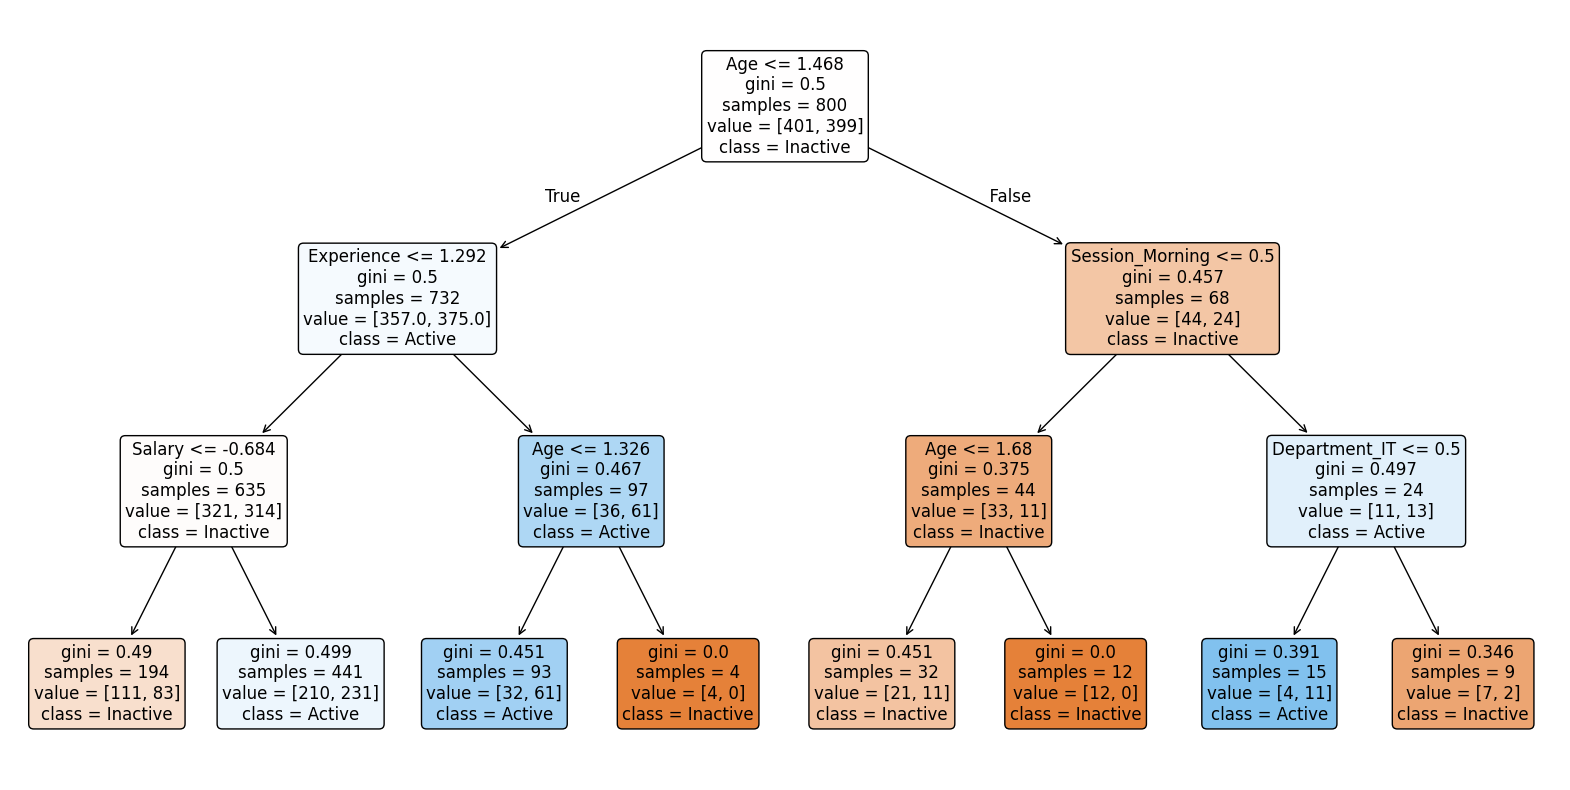

In [35]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=X_train.columns, class_names=['Inactive','Active'], filled=True, rounded=True, fontsize=12)
plt.show()

In [36]:
num_cols = ['Age', 'Salary', 'Experience']
X_kmenas = df[num_cols]

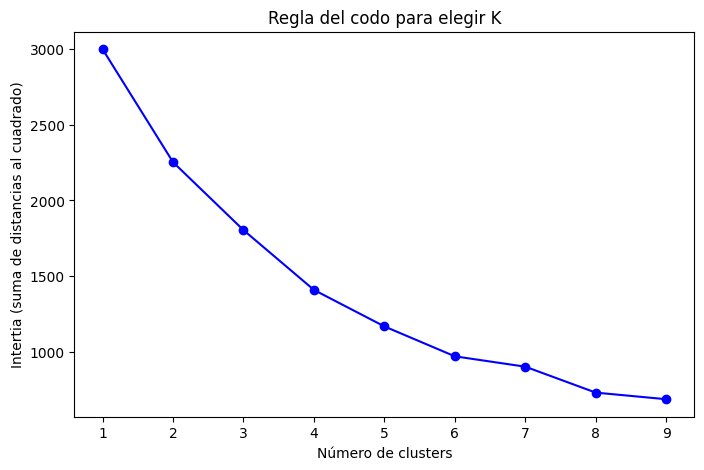

In [42]:
from sklearn.cluster import KMeans

inertia = []
K = range(1,10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_kmenas)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel("Número de clusters")
plt.ylabel("Intertia (suma de distancias al cuadrado)")
plt.title("Regla del codo para elegir K")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_kmenas)

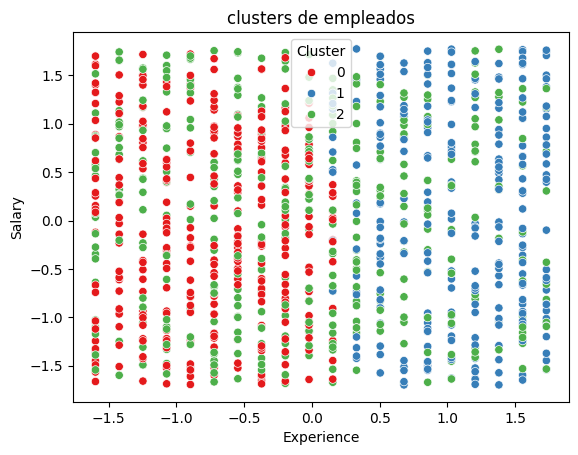

In [48]:
sns.scatterplot(data=df, x='Experience', y='Salary',hue='Cluster', palette='Set1')
plt.title('clusters de empleados')
plt.show()

In [49]:
df.groupby('Cluster')[['Age', 'Salary', 'Experience']].mean()


,Age,Salary,Experience
Cluster,,,
0,0.770625,-0.103242,-0.779086
1,0.555637,0.057661,1.066183
2,-1.000353,0.044309,-0.094191


In [50]:
df['Cluster'].value_counts()


Cluster
2    402
0    325
1    273
Name: count, dtype: int64

In [51]:
df.groupby('Cluster')[['Department_IT', 'Department_Sales']].sum()


,Department_IT,Department_Sales
Cluster,,
0,108,119
1,93,90
2,138,129


In [52]:
cluster_summary = df.groupby('Cluster')[['Age', 'Salary', 'Experience']].mean()
print("Promedios por cluster:\n", cluster_summary)


Promedios por cluster:
               Age    Salary  Experience
Cluster                                
0        0.770625 -0.103242   -0.779086
1        0.555637  0.057661    1.066183
2       -1.000353  0.044309   -0.094191


In [53]:
cluster_counts = df['Cluster'].value_counts()
print("\nCantidad de empleados por cluster:\n", cluster_counts)



Cantidad de empleados por cluster:
 Cluster
2    402
0    325
1    273
Name: count, dtype: int64


In [55]:
categorical_cols = ['Department_IT', 'Department_Sales', 'Status_Inactive']
cat_summary = df.groupby('Cluster')[categorical_cols].sum()
print("\nDistribución categórica por cluster:\n", cat_summary)



Distribución categórica por cluster:
          Department_IT  Department_Sales  Status_Inactive
Cluster                                                  
0                  108               119              154
1                   93                90              145
2                  138               129              200


In [58]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

mlp = MLPClassifier(hidden_layer_sizes=(32,16), max_iter=1000, random_state=42)

mlp.fit(X_train, y_train)

y_pred_train = mlp.predict(X_train)
y_pred_test = mlp.predict(X_test)
print("Accuracy train:", accuracy_score(y_train, y_pred_train))
print("Accuracy test:", accuracy_score(y_test, y_pred_test))

Accuracy train: 0.91125
Accuracy test: 0.525


C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [61]:
from sklearn.metrics import confusion_matrix, classification_report
# Predecimos sobre el test set
y_pred_test = mlp.predict(X_test)

# Creamos la matriz de confusión
report = classification_report(y_test, y_pred_test)
cm = confusion_matrix(y_test, y_pred_test)

print(cm)
print(report)


[[52 48]
 [47 53]]
              precision    recall  f1-score   support

       False       0.53      0.52      0.52       100
        True       0.52      0.53      0.53       100

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.52       200
weighted avg       0.53      0.53      0.52       200

